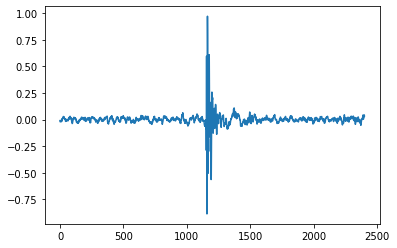

In [328]:
import librosa
import numpy as np
import python_speech_features
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



# audio_data = 'wav_20200705_174137.wav'
audio_data = '805.wav'
x , sr = librosa.load(audio_data , sr = 8000)

plt.figure()
plt.plot(x)

In [329]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),
                       min_periods=1,
                       center=True).max()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean

In [330]:
def extract_segments(clip, frames):
    FRAMES_PER_SEGMENT = frames -1
    WINDOW_SIZE = 150 * FRAMES_PER_SEGMENT
    STEP_SIZE = 150 * FRAMES_PER_SEGMENT // 2
    BANDS = 16
    
    
    segments = []
    s = 0
    
    normalization_factor = 1 / np.max(np.abs(clip))
    clip = clip * normalization_factor
    
    
    while len(clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]) == WINDOW_SIZE:
        signal = clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]
        
        
        envo, y_mean = envelope(signal, 8000, threshold=0.4)
        
        
        signal = signal[envo]
        
        if len(signal) == 0:
            pass
            
        else:
#             segments.append(signal)
            signal = signal
    
            print(signal.shape)
            plt.figure()
            plt.plot(signal)
            
#             print(len(signal))
        
        
            
        
        

#         plt.figure()
#         plt.plot(signal)
#         plt.plot(envo)
        
            # Comput features
#             mfccs = python_speech_features.mfcc(signal)
            mfccs = python_speech_features.mfcc(signal,
                                            samplerate=8000,
                                            winlen=0.005,
                                            winstep=0.005,
                                            numcep=BANDS,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.97,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)

            mfccs = mfccs.transpose()
            
            segments.append(mfccs)
        
        s = s+1
        
#     segments.append(mfccs)
    
    
    return segments
        
    

(437,)


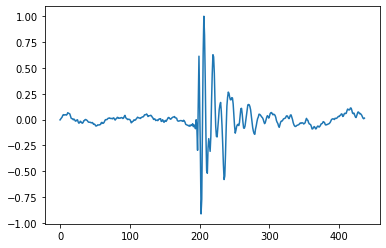

In [331]:
seg = extract_segments(x, 16)

# print(seg[1].shape)


# plt.plot(seg[1])
# for i, sig in enumerate(seg):
#     print(len(sig))

In [332]:
seg[0].shape

(16, 11)

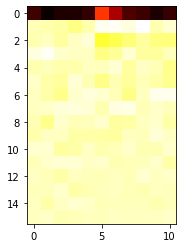

In [333]:
plt.imshow(seg[0], cmap='hot', interpolation='nearest')